In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
## Draw 100 random samples from a uniform distribution
## btwn 0 and 1
x1 = np.random.uniform(0, 1, 100)
x2 = 0.5 * x1 + (np.random.normal(0, 1, 100) / 10)
y = 2 + (2 * x1) + (0.3 * x2) + (np.random.normal(0, 1, 100))
x1.shape, x2.shape, y.shape

((100,), (100,), (100,))

(array([ 7., 13.,  8., 17., 10., 15.,  6.,  9.,  6.,  9.]),
 array([0.04457523, 0.1396266 , 0.23467797, 0.32972933, 0.4247807 ,
        0.51983206, 0.61488343, 0.7099348 , 0.80498616, 0.90003753,
        0.99508889]),
 <BarContainer object of 10 artists>)

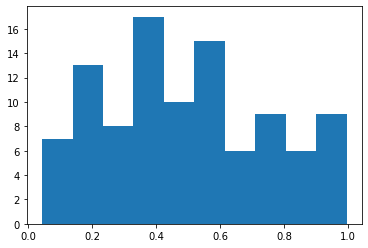

In [4]:
plt.hist(x1)

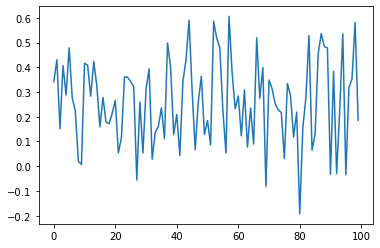

In [5]:
plt.plot(x2)

# Q1
Write out the form of the linear model. Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 $$

In [6]:
## fit OLS model
X = np.column_stack((x1,x2))
## add col of ones
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     24.63
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.24e-09
Time:                        22:41:44   Log-Likelihood:                -135.35
No. Observations:                 100   AIC:                             276.7
Df Residuals:                      97   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8463      0.204      9.031      0.000       1.441       2.252
x1             2.2639      0.652      3.471      0.001       0.969       3.558
x2             0.5491      0.994      0.552      0.582      -1.424       2.522
==============================================================================
Omnibus:                        1.401   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                0.879
Skew:                          -0.167   Prob(JB):                        0.644
Kurtosis:                       3.316   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q3 
Now fit a least squares regression to predict y using only x1. Comment on your results. Can you
reject the null hypothesis H0 : β1 = 0?

In [7]:
## fit OLS model
X1 = sm.add_constant(x1)
model = sm.OLS(y, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     49.30
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.90e-10
Time:                        22:41:45   Log-Likelihood:                -135.51
No. Observations:                 100   AIC:                             275.0
Df Residuals:                      98   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8420      0.204      9.049      0.000       1.438       2.246
x1             2.5621      0.365      7.021      0.000       1.838       3.286
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.896
Skew:                          -0.188   Prob(JB):                        0.639
Kurtosis:                       3.272   Cond. No.                         4.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q4
Question 4 (2 points)
Now fit a least squares regression to predict y using only x2. Comment on your results. Can you
reject the null hypothesis H0 : β1 = 0?


In [8]:
## fit OLS model
X2 = sm.add_constant(x2)
model = sm.OLS(y, X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     33.44
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           8.78e-08
Time:                        22:41:45   Log-Likelihood:                -141.20
No. Observations:                 100   AIC:                             286.4
Df Residuals:                      98   BIC:                             291.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2211      0.183     12.130      0.000       1.858       2.585
x1             3.4040      0.589      5.783      0.000       2.236       4.572
==============================================================================
Omnibus:                        2.530   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                2.050
Skew:                           0.172   Prob(JB):                        0.359
Kurtosis:                       3.611   Cond. No.                         6.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q6
*What does VIF do? Describe how you may apply VIF to this problem.*

---

**Variance inflation factors (VIF) help detect multicollinearity between predictor variables. **

VIF of a coefficient B_J is the ratio, or times factor, by which the variance of B_J is "inflated"/increased by the existence of correlation among the other predictor variables.

THe VIF for the jth predictor $x_j$ is:
$$ VIF_j = \frac{1}{1-R_j^2} $$

*Where $R_j^2$ is the R^2 value calculated by regressing the jth predictor $x_j$ on the remaining predictors x (predict value of $x_j$ based on the values of the other x's)

## Interpreting VIF:
* VIF = 1 means NO correlation between $x_j$ and the other predictor x's
* VIF > 4 need investigation, and VIF > 10 is a sign of serious multicollinearity

For this prob, we can try to calculated VIF of x1 and x2 to detect multicollinearity between predictors. If VIF above a certain threshold like 4, it indicates they may be highly correlated and either need to remove some predictors or transform in some way (eg PCA)